In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd  # Pandas for data manipulation
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns  # Seaborn for statistical data visualization
from folium.plugins import HeatMap  # Folium for creating heat maps
import ipywidgets as widgets  # Ipywidgets for interactive widgets in Jupyter Notebook
from IPython.display import display  # Display module for output visualization


# ==========================================================
# This script analyzes the following variables:
# ----------------------------------------------------------
# - Z0M          : Surface roughness length
# - CLRSKY_DAYS  : Number of clear sky days
# - MIDDAY_INSOL : Midday solar insolation
# - PSH          : Potential sunshine hours
# - T2M_MAX      : Maximum temperature
# - TS           : Surface temperature
# - T2M_MIN      : Minimum temperature
# ==========================================================


In [3]:
df = pd.read_csv(r"D:\\project Fainal\sorted_data_large\sorted_data_large.csv")
df2 = pd.read_csv(r"D:\project Fainal\sorted_data_large\sorted_data_small.csv")

In [4]:
# Displaying the column names of the DataFrame
df.columns

Index(['Unnamed: 0', 'LAT', 'LON', 'YEAR', 'DOY', 'EVLAND', 'GWETPROF',
       'GWETROOT', 'GWETTOP', 'PRECSNO', 'PRECTOTCORR', 'QV2M', 'RH2M', 'RHOA',
       'T10M', 'T10M_MAX', 'T10M_MIN', 'T2M', 'T2M_MAX', 'T2M_MIN', 'TO3',
       'TS', 'TSOIL1', 'TSOIL2', 'TSOIL3', 'TSOIL4', 'TSOIL5', 'TSOIL6',
       'TS_MAX', 'TS_MIN', 'WD2M', 'WD50M', 'WS2M', 'WS2M_MAX', 'WS2M_MIN',
       'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'Z0M'],
      dtype='object')

In [5]:
df2.columns

Index(['Unnamed: 0', 'LAT', 'LON', 'YEAR', 'DOY', 'AIRMASS',
       'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB',
       'ALLSKY_SFC_UV_INDEX', 'CLOUD_AMT', 'CLOUD_AMT_DAY', 'CLOUD_AMT_NIGHT',
       'CLRSKY_DAYS', 'MIDDAY_INSOL', 'PSH', 'PW'],
      dtype='object')

In [6]:
df_selected = df[['Unnamed: 0', 'LAT', 'LON', 'YEAR', 'DOY', 'EVLAND', 'Z0M']]


In [7]:
df1_selected = df2[['CLRSKY_DAYS', 'MIDDAY_INSOL', 'PSH']]


In [8]:
df1 = pd.concat([df_selected, df1_selected], axis=1)


In [8]:
df1

,Unnamed: 0,LAT,LON,YEAR,DOY,EVLAND,Z0M,CLRSKY_DAYS,MIDDAY_INSOL,PSH
0,17,22.5,25.625,2019,1,0.00,0.01,0.0,64.97,0.36
1,18,22.5,26.250,2019,1,0.00,0.01,0.0,55.59,0.33
2,19,22.5,26.875,2019,1,0.00,0.01,0.0,46.49,0.29
3,20,22.5,27.500,2019,1,0.00,0.01,0.0,40.42,0.27
4,21,22.5,28.125,2019,1,0.00,0.01,0.0,37.13,0.27
...,...,...,...,...,...,...,...,...,...,...
503971,122605,31.0,33.125,2023,365,0.13,0.01,NaN,NaN,NaN
503972,122609,31.5,25.625,2023,365,0.14,0.01,NaN,NaN,NaN
503973,122610,31.5,26.250,2023,365,0.09,0.00,NaN,NaN,NaN
503974,122617,31.5,30.625,2023,365,0.92,0.01,NaN,NaN,NaN


In [9]:
# Selecting relevant columns for analysis

df1=df[['LAT','LON','YEAR','DOY','T2M_MAX','TS','T2M_MIN']]

In [10]:
df1

,LAT,LON,YEAR,DOY,T2M_MAX,TS,T2M_MIN
0,22.5,25.625,2019,1,14.83,8.96,3.43
1,22.5,26.250,2019,1,17.26,10.54,4.39
2,22.5,26.875,2019,1,18.91,11.85,5.14
3,22.5,27.500,2019,1,19.51,12.56,6.18
4,22.5,28.125,2019,1,19.77,12.80,6.36
...,...,...,...,...,...,...,...
503971,31.0,33.125,2023,365,20.07,16.84,14.73
503972,31.5,25.625,2023,365,19.91,15.94,13.15
503973,31.5,26.250,2023,365,19.36,16.62,14.17
503974,31.5,30.625,2023,365,19.42,18.79,16.32


# ==========================================================
# Generating summary statistics for the selected columns
# ----------------------------------------------------------
# This command computes key statistical measures for each 
# numerical column in the DataFrame `df1`, including:


In [11]:
# Generating summary statistics for the selected columns
df1.describe()

,LAT,LON,YEAR,DOY,T2M_MAX,TS,T2M_MIN
count,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000
mean,26.692029,29.938859,2020.999452,183.100219,30.213329,23.962220,15.967068
std,2.694820,2.821385,1.414021,105.424248,8.074421,8.329484,7.056959
min,22.500000,25.000000,2019.000000,1.000000,6.470000,2.210000,-3.460000
25%,24.500000,27.500000,2020.000000,92.000000,23.310000,16.460000,9.850000
50%,26.500000,30.000000,2021.000000,183.000000,31.100000,24.860000,16.660000
75%,29.000000,32.500000,2022.000000,274.000000,37.060000,31.210000,22.000000
max,31.500000,36.250000,2023.000000,366.000000,49.260000,43.610000,34.230000


# ==========================================================
# Grouping data by 'YEAR' and computing summary statistics
# ----------------------------------------------------------
# This code groups the dataset by the 'YEAR' column and 
# calculates the mean, minimum, and maximum values for 
# the temperature-related columns: 'T2M_MIN', 'T2M_MAX', and 'TS'.
#
# - 'mean': Average value for each year
# - 'min' : Minimum recorded value for each year
# - 'max' : Maximum recorded value for each year
#
# This helps in identifying temperature trends over the years.
# ==========================================================

In [12]:
# Grouping data by YEAR and calculating mean, min, and max for temperature-related columns
df1.groupby('YEAR')[['T2M_MIN', 'T2M_MAX', 'TS']].agg(['mean', 'min', 'max'])


T2M_MIN                 T2M_MAX                      TS             
           mean   min    max       mean   min    max       mean   min    max
YEAR                                                                        
2019  15.922518 -2.50  33.30  30.196840  8.92  48.40  23.951535  3.85  43.40
2020  15.708690 -1.83  32.78  29.915839  8.24  49.02  23.738928  4.44  43.61
2021  16.063480 -1.63  33.83  30.574776  6.47  47.65  24.124679  4.47  42.44
2022  15.581033 -3.46  32.73  29.697600  7.22  47.66  23.509108  2.21  42.41
2023  16.560328 -1.03  34.23  30.682407  9.03  49.26  24.487462  4.85  42.47

In [13]:
# Sorting data by YEAR in ascending order
df1=df1.sort_values('YEAR')


In [14]:
# Displaying summary statistics for T2M_MIN and T2M_MAX columns
df[['T2M_MIN', 'T2M_MAX']].describe()


,T2M_MIN,T2M_MAX
count,503976.000000,503976.000000
mean,15.967068,30.213329
std,7.056959,8.074421
min,-3.460000,6.470000
25%,9.850000,23.310000
50%,16.660000,31.100000
75%,22.000000,37.060000
max,34.230000,49.260000


In [15]:
import folium


In [16]:
# Creating a base map centered on Egypt (latitude: 26.8206, longitude: 30.8025)
map_center = [26.8206, 30.8025]  
my_map = folium.Map(location=map_center, zoom_start=6)


# ==========================================================
# Visualizing Temperature Distribution using Histograms
# ----------------------------------------------------------
# This code generates a histogram to analyze the distribution 
# of minimum and maximum temperatures in the dataset.
#
# - The red histogram represents 'T2M_MAX' (Maximum Temperature).
# - The blue histogram represents 'T2M_MIN' (Minimum Temperature).
# - KDE (Kernel Density Estimate) is enabled to visualize 
#   the probability density function of the data.
#
# This helps in understanding the spread and density of 
# temperature values over different ranges.
# ==========================================================




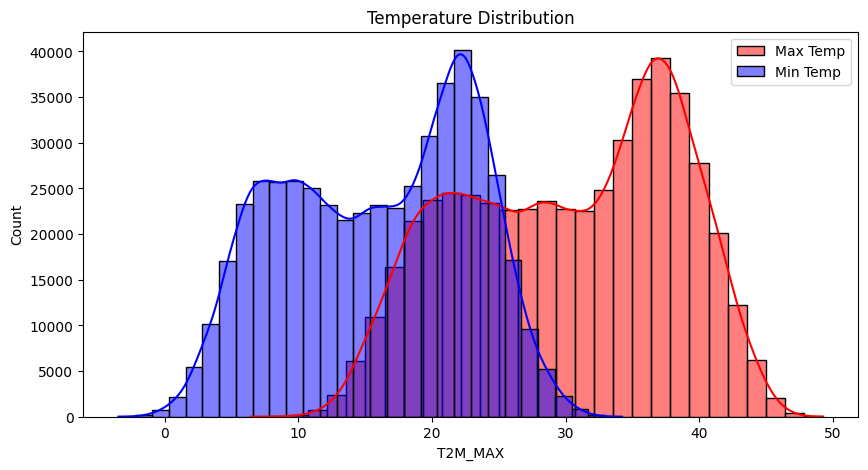

In [17]:
# Plotting temperature distribution using histograms
plt.figure(figsize=(10, 5))  # Setting figure size
sns.histplot(df['T2M_MAX'], bins=30, kde=True, color="red", label="Max Temp")  # Histogram for max temperature
sns.histplot(df['T2M_MIN'], bins=30, kde=True, color="blue", label="Min Temp")  # Histogram for min temperature
plt.legend()  # Adding legend
plt.title("Temperature Distribution")  # Setting plot title
plt.show()  # Displaying the plot

In [18]:
# Dropping rows with missing values in LAT, LON, and T2M_MAX columns
df = df.dropna(subset=['LAT', 'LON', 'T2M_MAX'])  

# Reducing the number of points if the dataset is too large (optional)
df_sample = df.sample(n=5000) if len(df) > 5000 else df  # Sampling 5000 points if the dataset is large  

# Creating an interactive map centered on the mean location of the dataset
m = folium.Map(location=[df_sample['LAT'].mean(), df_sample['LON'].mean()], zoom_start=5)  

# Preparing heatmap data (latitude, longitude, and temperature values)
heat_data = list(zip(df_sample['LAT'], df_sample['LON'], df_sample['T2M_MAX']))  

# Adding the heatmap layer to the map
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

# The heatmap shows the geographic distribution of data in Egypt, where warm colors (yellow and green) represent high-density areas, while cool colors (blue) indicate #lower-density regions. The data could be related to temperature, the number of users, or any other geographic variable. The goal of the analysis is to understand spatial #         patterns and identify any unusual data distributions.









In [19]:
m

# -- Plotting a bar chart to visualize mean temperatures  
# -- Red bar represents the Mean Max Temperature (30.21°C)  
# -- Blue bar represents the Mean Min Temperature (15.97°C)  
# -- Y-axis shows the temperature values in °C  
#  --X-axis contains two categories: "Mean Max Temperature" & "Mean Min Temperature"  
# -- Title: "Mean Temperature Report" to describe the chart  


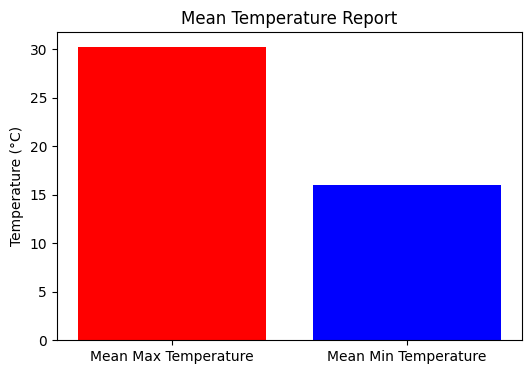

In [18]:
categories = ["Mean Max Temperature", "Mean Min Temperature"]
values = [30.21, 15.97]

plt.figure(figsize=(6,4))
plt.bar(categories, values, color=['red', 'blue'])
plt.ylabel("Temperature (°C)")
plt.title("Mean Temperature Report")
plt.show()

In [19]:
# Identify categorical vs. numerical columns
num_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df1.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Numerical Columns: {num_cols}")
print(f"Categorical Columns: {cat_cols}")

Numerical Columns: ['LAT', 'LON', 'YEAR', 'DOY', 'T2M_MAX', 'TS', 'T2M_MIN']
Categorical Columns: []


In [20]:
# 2. Feature Inspection
# Basic statistics for numerical features
print(df1[num_cols].describe())
# Unique values count for categorical features
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df1[col].value_counts())


                 LAT            LON           YEAR            DOY  \
count  503976.000000  503976.000000  503976.000000  503976.000000   
mean       26.692029      29.938859    2020.999452     183.100219   
std         2.694820       2.821385       1.414021     105.424248   
min        22.500000      25.000000    2019.000000       1.000000   
25%        24.500000      27.500000    2020.000000      92.000000   
50%        26.500000      30.000000    2021.000000     183.000000   
75%        29.000000      32.500000    2022.000000     274.000000   
max        31.500000      36.250000    2023.000000     366.000000   

             T2M_MAX             TS        T2M_MIN  
count  503976.000000  503976.000000  503976.000000  
mean       30.213329      23.962220      15.967068  
std         8.074421       8.329484       7.056959  
min         6.470000       2.210000      -3.460000  
25%        23.310000      16.460000       9.850000  
50%        31.100000      24.860000      16.660000  
75%    

In [21]:
# Missing values
total_missing = df1.isnull().sum()
print("\nMissing Values:\n", total_missing[total_missing > 0])



Missing Values:
 Series([], dtype: int64)


In [22]:
# Handle missing values (Example: Fill with mean for numerical, mode for categorical)
df1.fillna(df1.mean(), inplace=True)
for col in cat_cols:
    df1[col].fillna(df1[col].mode()[0], inplace=True)


In [23]:
# Check duplicates
duplicates = df1.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df1.drop_duplicates(inplace=True)



Number of duplicate rows: 0


In [24]:
dff = ["Unnamed: 0", "LAT", "LON", "YEAR", "DOY", "EVLAND", "Z0M", "CLRSKY_DAYS", "MIDDAY_INSOL", "PSH"]


In [25]:
dff

['Unnamed: 0',
 'LAT',
 'LON',
 'YEAR',
 'DOY',
 'EVLAND',
 'Z0M',
 'CLRSKY_DAYS',
 'MIDDAY_INSOL',
 'PSH']

# Plotting the distribution of Surface Roughness Length (Z0M)
# The histogram shows the frequency of different Z0M values with a KDE overlay.


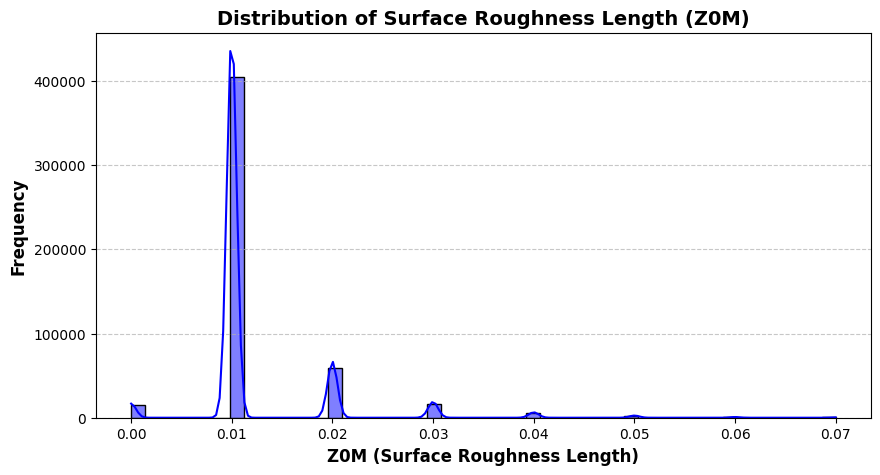

In [ ]:


# Set figure size for better visualization
plt.figure(figsize=(10, 5))

# Plot histogram with KDE (Kernel Density Estimation)
sns.histplot(df['Z0M'], bins=50, kde=True, color='blue', edgecolor='black')

# Improve labels and title for better readability
plt.xlabel("Z0M (Surface Roughness Length)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.title("Distribution of Surface Roughness Length (Z0M)", fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


# Scatter plot showing the relationship between Surface Roughness Length (Z0M) 
# and Midday Solar Insolation. The transparency (alpha) is set to 0.5 for better visibility.


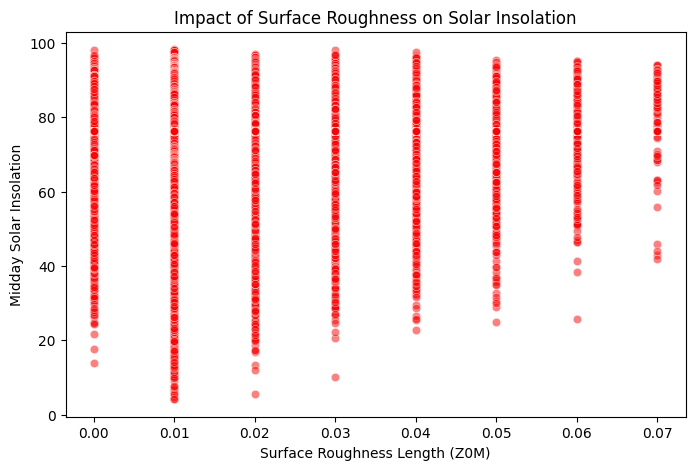

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df1['Z0M'], y=df1['MIDDAY_INSOL'], alpha=0.5, color='red')

plt.xlabel("Surface Roughness Length (Z0M)")
plt.ylabel("Midday Solar Insolation")
plt.title("Impact of Surface Roughness on Solar Insolation")

plt.show()

# Computing the correlation matrix for selected variables to analyze relationships
# - MIDDAY_INSOL and PSH show a strong positive correlation (0.963).
# - CLRKSY_DAYS has a moderate positive correlation with MIDDAY_INSOL and PSH.
# - Z0M has very weak correlations with the other variables.


In [ ]:
correlation_matrix = df1[['Z0M', 'CLRSKY_DAYS', 'MIDDAY_INSOL', 'PSH']].corr()
print(correlation_matrix)


                   Z0M  CLRSKY_DAYS  MIDDAY_INSOL       PSH
Z0M           1.000000    -0.002108      0.009741  0.011169
CLRSKY_DAYS  -0.002108     1.000000      0.264947  0.265309
MIDDAY_INSOL  0.009741     0.264947      1.000000  0.963499
PSH           0.011169     0.265309      0.963499  1.000000


# The correlation heatmap provides a visual representation of the relationships between variables.
# - Strong correlation (0.96) between MIDDAY_INSOL and PSH, indicating they are closely related.
# - Moderate correlation (0.26 - 0.27) between CLRKSY_DAYS and both MIDDAY_INSOL & PSH.
# - Z0M shows almost no correlation with any other variables, suggesting it has little impact.


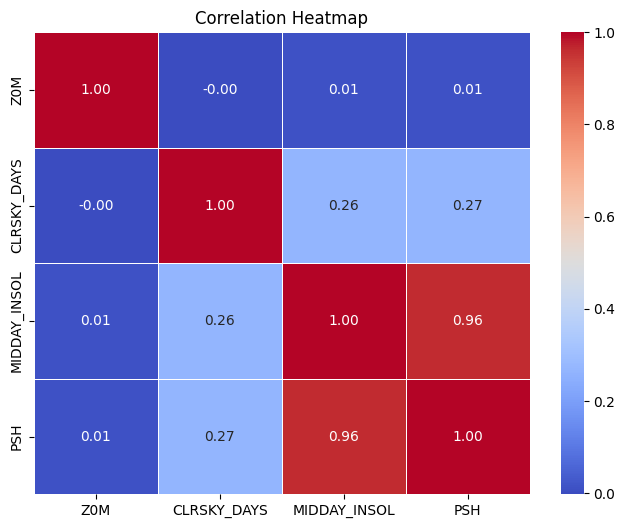

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


# OLS Regression Summary Interpretation:
# - Dependent Variable: MIDDAY_INSOL
# - Independent Variable: Z0M
# - R-squared = 0.000: This means Z0M explains almost none of the variation in MIDDAY_INSOL.
# - Coefficient of Z0M = 11.3477: A unit increase in Z0M is associated with an increase of 11.35 in MIDDAY_INSOL.
# - P-value < 0.05: The coefficient is statistically significant, but since R-squared is 0, the relationship is not meaningful.
# - Conclusion: Z0M has no practical impact on MIDDAY_INSOL despite statistical significance.


In [ ]:
import statsmodels.api as sm

X = df1[['Z0M']] 
y = df1['MIDDAY_INSOL']  
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit() 
print(model.summary())  # عرض النتائج


                            OLS Regression Results                            
Dep. Variable:           MIDDAY_INSOL   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     47.82
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           4.67e-12
Time:                        15:26:13   Log-Likelihood:            -1.7612e+06
No. Observations:              503976   AIC:                         3.522e+06
Df Residuals:                  503974   BIC:                         3.523e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.1117      0.023   3320.996      0.0

C:\Users\AL Motahida\AppData\Local\Temp\ipykernel_10340\1529408707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df1['Z0M'], y=df1['MIDDAY_INSOL'], palette="coolwarm")


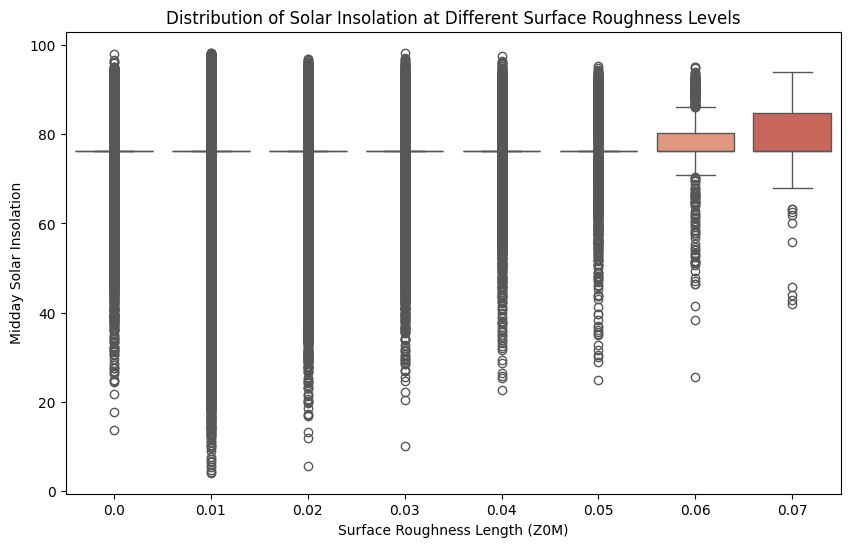

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Z0M'], y=df1['MIDDAY_INSOL'], palette="coolwarm")

plt.xlabel("Surface Roughness Length (Z0M)")
plt.ylabel("Midday Solar Insolation")
plt.title("Distribution of Solar Insolation at Different Surface Roughness Levels")

plt.show()


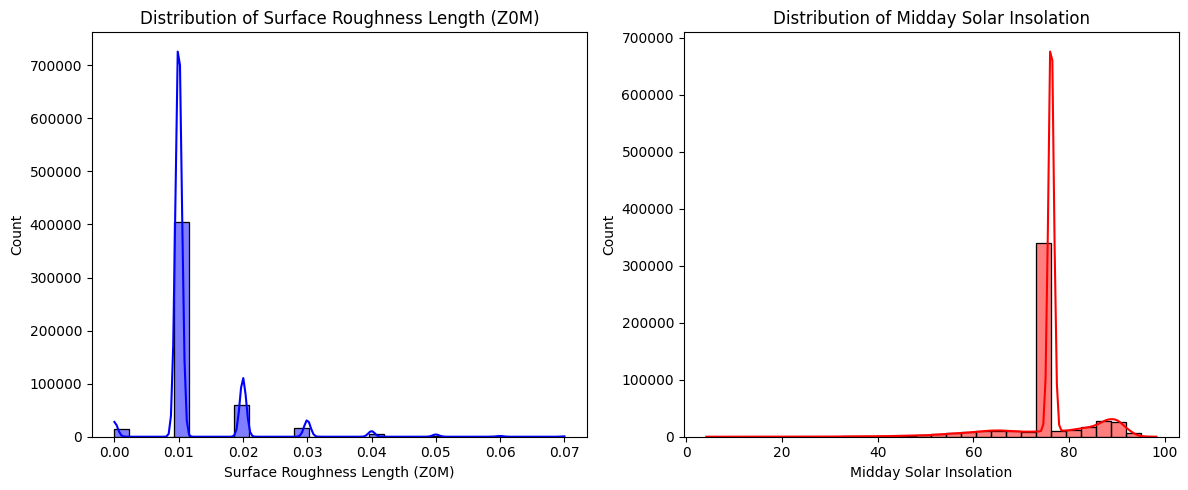

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df1['Z0M'], bins=30, kde=True, color='blue')
plt.xlabel("Surface Roughness Length (Z0M)")
plt.title("Distribution of Surface Roughness Length (Z0M)")

plt.subplot(1, 2, 2)
sns.histplot(df1['MIDDAY_INSOL'], bins=30, kde=True, color='red')
plt.xlabel("Midday Solar Insolation")
plt.title("Distribution of Midday Solar Insolation")

plt.tight_layout()
plt.show()


In [ ]:

anova_result = stats.f_oneway(
    df1[df1['Z0M'] == df1['Z0M'].unique()[0]]['CLRSKY_DAYS'],
    df1[df1['Z0M'] == df1['Z0M'].unique()[1]]['CLRSKY_DAYS'],
    df1[df1['Z0M'] == df1['Z0M'].unique()[2]]['CLRSKY_DAYS']
)

print("ANOVA Test Result:", anova_result)


ANOVA Test Result: F_onewayResult(statistic=np.float64(4.3664937185108466), pvalue=np.float64(0.012696183390446458))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(df1[['Z0M']], df1['MIDDAY_INSOL'], test_size=0.2, random_state=42)

# إنشاء نموذج الانحدار
model = LinearRegression()
model.fit(X_train, y_train)

# توقع القيم
y_pred = model.predict(X_test)

# تقييم النموذج
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 3.9971990353492948
R² Score: 3.103681031924044e-05


In [ ]:
print(df2.head())  


   Unnamed: 0   LAT   LON  YEAR  DOY  AIRMASS  ALLSKY_SFC_SW_DWN  \
0           1  22.5  25.5  2019    1     3.93              14.94   
1           2  22.5  26.5  2019    1     4.02              13.70   
2           3  22.5  27.5  2019    1     4.14              12.29   
3           4  22.5  28.5  2019    1     4.29              11.38   
4           5  22.5  29.5  2019    1     4.46              11.21   

   ALLSKY_SFC_UVA  ALLSKY_SFC_UVB  ALLSKY_SFC_UV_INDEX  CLOUD_AMT  \
0            0.81            0.02                 1.12      39.29   
1            0.75            0.02                 1.04      42.90   
2            0.67            0.01                 0.91      55.86   
3            0.62            0.01                 0.85      69.87   
4            0.59            0.01                 0.80      81.09   

   CLOUD_AMT_DAY  CLOUD_AMT_NIGHT  CLRSKY_DAYS  MIDDAY_INSOL   PSH    PW  
0          63.03            19.19          0.0         64.97  0.36  0.69  
1          74.22          

In [ ]:
file_large = r"D:\project Fainal\sorted_data_large\sorted_data_large.csv"
file_small = r"D:\project Fainal\sorted_data_large\sorted_data_small.csv"

df_large = pd.read_csv(file_large)
df_small = pd.read_csv(file_small)

print(df_large.head())
print(df_small.head())

   Unnamed: 0   LAT     LON  YEAR  DOY  EVLAND  GWETPROF  GWETROOT  GWETTOP  \
0          17  22.5  25.625  2019    1     0.0      0.37      0.36     0.09   
1          18  22.5  26.250  2019    1     0.0      0.27      0.27     0.04   
2          19  22.5  26.875  2019    1     0.0      0.20      0.20     0.04   
3          20  22.5  27.500  2019    1     0.0      0.15      0.15     0.04   
4          21  22.5  28.125  2019    1     0.0      0.20      0.20     0.04   

   PRECSNO  ...  TS_MIN   WD2M  WD50M  WS2M  WS2M_MAX  WS2M_MIN  WS50M  \
0      0.0  ...    1.39  323.8  325.9  2.82      5.11      1.45   6.02   
1      0.0  ...    2.33  315.7  317.8  3.01      5.05      1.61   6.40   
2      0.0  ...    3.23  319.0  319.0  2.39      3.50      1.53   5.71   
3      0.0  ...    4.83  323.3  323.8  2.52      3.87      1.63   5.84   
4      0.0  ...    4.43  324.3  326.0  2.44      3.59      1.44   5.60   

   WS50M_MAX  WS50M_MIN   Z0M  
0       7.70       4.00  0.01  
1       8.18    

In [53]:
print(df_large.describe())


          Unnamed: 0            LAT            LON           YEAR  \
count  503976.000000  503976.000000  503976.000000  503976.000000   
mean    59560.783779      26.692029      29.938859    2020.999452   
std     36179.871911       2.694820       2.821385       1.414021   
min         4.000000      22.500000      25.000000    2019.000000   
25%     27587.750000      24.500000      27.500000    2020.000000   
50%     59278.000000      26.500000      30.000000    2021.000000   
75%     90977.000000      29.000000      32.500000    2022.000000   
max    122954.000000      31.500000      36.250000    2023.000000   

                 DOY         EVLAND       GWETPROF       GWETROOT  \
count  503976.000000  503976.000000  503976.000000  503976.000000   
mean      183.100219       0.120438       0.291803       0.289672   
std       105.424248       0.282042       0.096077       0.096235   
min         1.000000       0.000000       0.090000       0.090000   
25%        92.000000       0.0000

In [54]:
columns_of_interest = ["Z0M", "CLRSKY_DAYS", "MIDDAY_INSOL", "PSH", "T2M_MAX", "TS", "T2M_MIN"]


In [59]:
df5 = df_small.merge(df_large, on=['LAT', 'LON', 'YEAR', 'DOY'], how='inner')


In [61]:
print(df5.columns)

Index(['Unnamed: 0_x', 'LAT', 'LON', 'YEAR', 'DOY', 'AIRMASS',
       'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB',
       'ALLSKY_SFC_UV_INDEX', 'CLOUD_AMT', 'CLOUD_AMT_DAY', 'CLOUD_AMT_NIGHT',
       'CLRSKY_DAYS', 'MIDDAY_INSOL', 'PSH', 'PW', 'Unnamed: 0_y', 'EVLAND',
       'GWETPROF', 'GWETROOT', 'GWETTOP', 'PRECSNO', 'PRECTOTCORR', 'QV2M',
       'RH2M', 'RHOA', 'T10M', 'T10M_MAX', 'T10M_MIN', 'T2M', 'T2M_MAX',
       'T2M_MIN', 'TO3', 'TS', 'TSOIL1', 'TSOIL2', 'TSOIL3', 'TSOIL4',
       'TSOIL5', 'TSOIL6', 'TS_MAX', 'TS_MIN', 'WD2M', 'WD50M', 'WS2M',
       'WS2M_MAX', 'WS2M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'Z0M'],
      dtype='object')


In [62]:
print([col for col in df.columns if 'PSH' in col])


['PSH']


In [63]:
print([col for col in df.columns if 'Z0M' in col])


['Z0M']


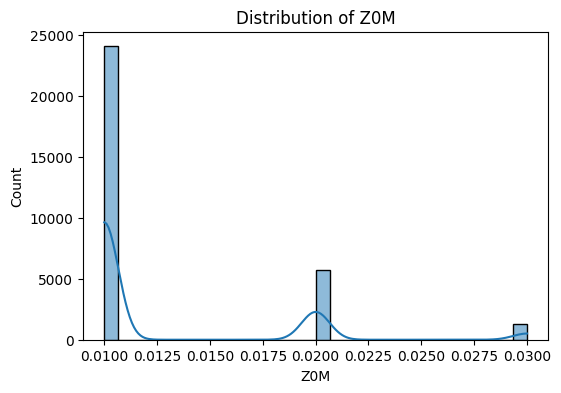

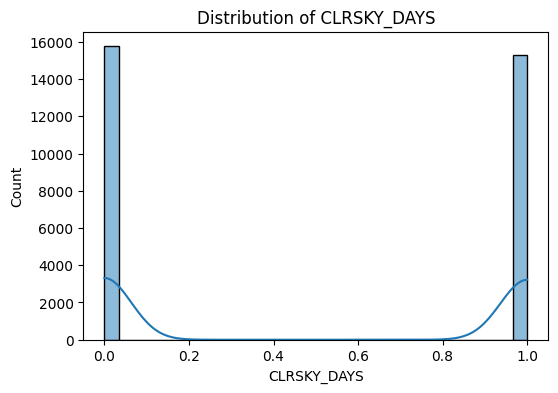

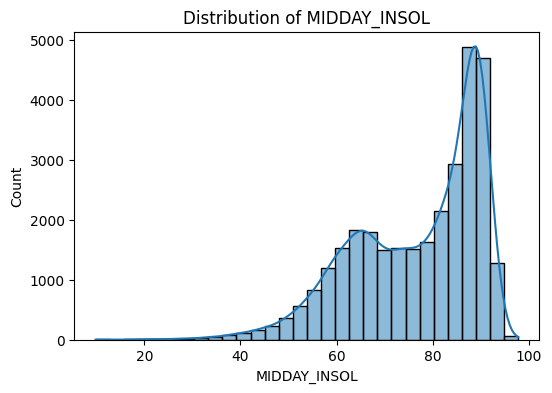

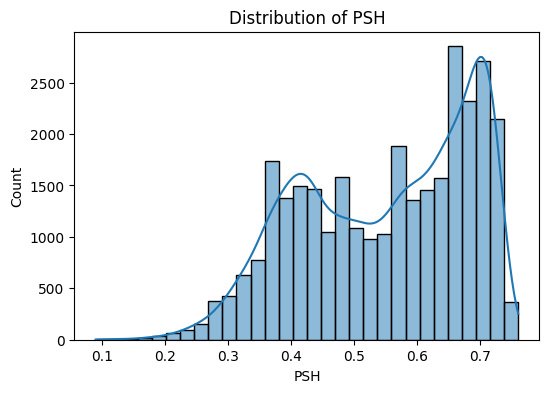

In [65]:
columns_of_interest = ['Z0M', 'CLRSKY_DAYS', 'MIDDAY_INSOL', 'PSH']

for col in columns_of_interest:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

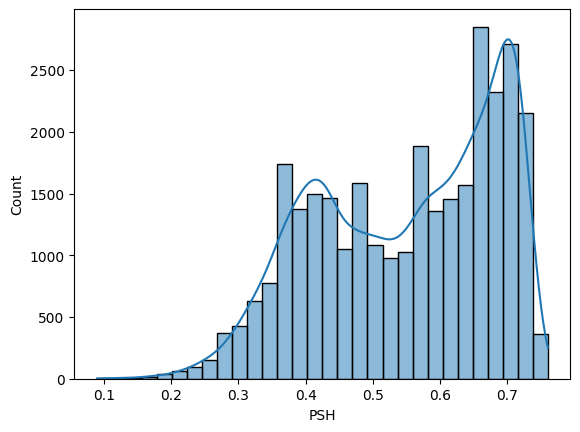

In [68]:
sns.histplot(df5['PSH'], bins=30, kde=True)
plt.show()


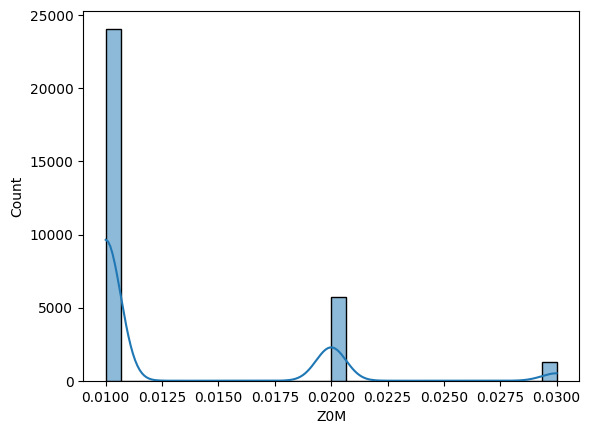

In [69]:
sns.histplot(df5['Z0M'], bins=30, kde=True)
plt.show()

In [70]:
print(df5[['PSH', 'Z0M']].corr())


          PSH       Z0M
PSH  1.000000 -0.038473
Z0M -0.038473  1.000000


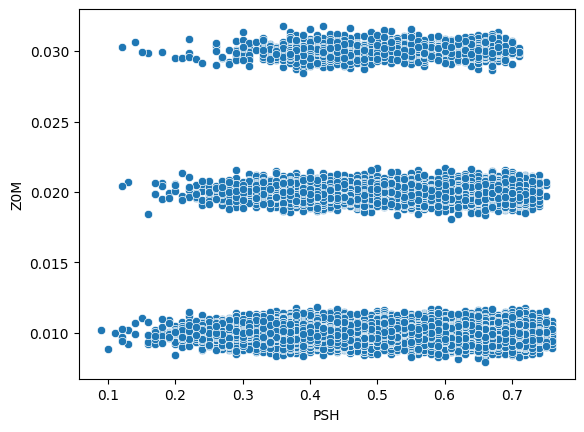

In [ ]:

sns.scatterplot(x=df5['PSH'], y=df5['Z0M'] + np.random.normal(0, 0.0005, size=len(df5)))
plt.show()


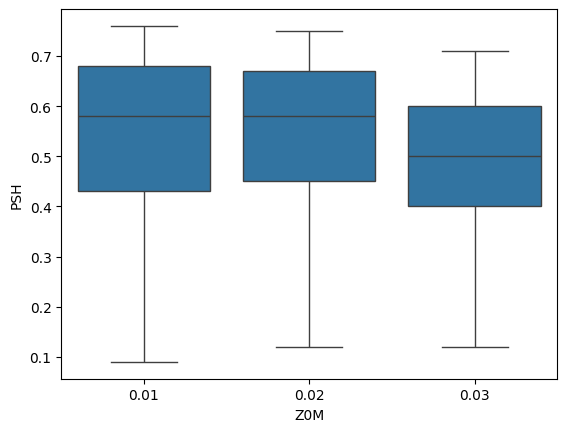

In [76]:
df5['Z0M'] = df5['Z0M'].astype('category')
sns.boxplot(x=df5['Z0M'], y=df5['PSH'])
plt.show()
